### Import required packages

In [1]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

%matplotlib inline

In [11]:
train = pd.read_csv('dataset_training-set.csv')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [13]:
# checking for null values
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [14]:
train.isnull().sum().sum()

0

In [15]:
train_0, train_1 = train['label'].value_counts()[0] / len(train.index), train['label'].value_counts()[1] / len(train.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))

In Train: there are 0.3193776697977085 % of class 0 and 0.6806223302022916 % of class 1


Text(0.5, 1.0, 'class distribution of train dataset')

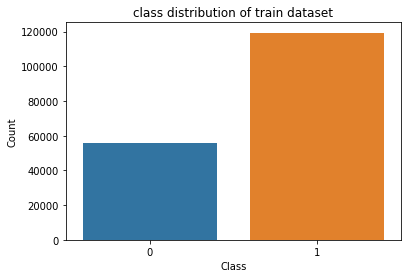

In [16]:
ax = sns.countplot(x='label', data=train)
ax.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")


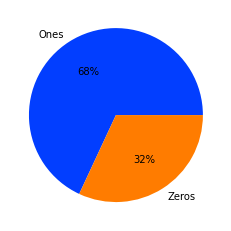

In [17]:
#define data
data = train['label'].value_counts()
labels = ['Ones', 'Zeros']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [18]:
# All the datatypes in our dataset
train.dtypes.value_counts()

int64      30
float64    11
object      4
dtype: int64

In [19]:
# Categorical feature names
train.select_dtypes(exclude=np.number).columns

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [20]:
# Numeric features names
t = train.select_dtypes(include=np.number).columns

### From the research paper we found that there are binary columns also numerical but binary: 'is_sm_ips_ports', 'is_ftp_login'

In [21]:
train['is_sm_ips_ports'].value_counts()

0    172579
1      2762
Name: is_sm_ips_ports, dtype: int64

### The col "is_ftp_login" has few wrong values like 2, 4. It should only have 0 and 1, If the ftp session is accessed by user and password then 1 else 0. Need to fix this.

* Replacing all the values apart from 0 and 1 from these two columns to be 1s.

In [22]:
train['is_ftp_login'].value_counts()

0    172774
1      2545
4        16
2         6
Name: is_ftp_login, dtype: int64

In [23]:
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])

In [24]:
train['is_ftp_login'].value_counts()

0    172774
1      2567
Name: is_ftp_login, dtype: int64

### In the feature "service" we have "-" we need to replace that with None.

In [25]:
train['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [26]:
# removing all the "-" and replacing those with "None"
train['service'] = train['service'].apply(lambda x:"None" if x=="-" else x)

In [27]:
train['service'].value_counts()

None        94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

### Saving files to disk

In [28]:
train.to_csv('cleaned_train.csv', index=False)